# Análísis 

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.decomposition import PCA 

In [3]:
#cargar el df de resultados, filtrarlo para después hacer merge con el df de NSE.
resultados =pd.read_csv ("C:/Users/ASUS/Downloads/DATOS/ResultadosElectorales_2023_Generales.csv")
comunas = [f"Comuna {i:02d}" for i in range(1, 16)]
df_filtrado = resultados[(resultados["cargo_nombre"] == "PRESIDENTE Y VICE") & (resultados["seccion_nombre"].isin(comunas))]
df_agrupado = df_filtrado.groupby("seccion_nombre")["votos_cantidad"].sum().reset_index()
df_agrupado_partidos = df_filtrado.groupby(["seccion_nombre", "agrupacion_nombre"])["votos_cantidad"].sum().reset_index()
idx_partidos = df_agrupado_partidos.groupby("seccion_nombre")["votos_cantidad"].idxmax()
partidos_con_mas_votos = df_agrupado_partidos.loc[idx_partidos]
partidos_con_mas_votos



C:\Users\ASUS\AppData\Local\Temp\ipykernel_4764\4287082552.py:2: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  resultados =pd.read_csv ("C:/Users/ASUS/Downloads/DATOS/ResultadosElectorales_2023_Generales.csv")


,seccion_nombre,agrupacion_nombre,votos_cantidad
2,Comuna 01,JUNTOS POR EL CAMBIO,45975
7,Comuna 02,JUNTOS POR EL CAMBIO,57022
12,Comuna 03,JUNTOS POR EL CAMBIO,39075
19,Comuna 04,UNION POR LA PATRIA,51401
22,Comuna 05,JUNTOS POR EL CAMBIO,43259
27,Comuna 06,JUNTOS POR EL CAMBIO,54873
32,Comuna 07,JUNTOS POR EL CAMBIO,48420
39,Comuna 08,UNION POR LA PATRIA,43136
44,Comuna 09,UNION POR LA PATRIA,39233
47,Comuna 10,JUNTOS POR EL CAMBIO,41986


In [6]:
# Crear un DataFrame a partir de la lista de comunas y el NSE
nse_resultados = [2.64774129, 3.30260217, 2.72812078, 2.29991986, 2.80579369, 2.83694905, 2.82425392, 2.13634426, 2.43595075, 2.58963639, 2.6800347, 2.74851318, 2.8483856, 2.9288498, 2.73709952]
df_nse = pd.DataFrame({'Comuna': comunas, 'NSE': nse_resultados})
df_nse

,Comuna,NSE
0,Comuna 01,2.647741
1,Comuna 02,3.302602
2,Comuna 03,2.728121
3,Comuna 04,2.299920
4,Comuna 05,2.805794
5,Comuna 06,2.836949
6,Comuna 07,2.824254
7,Comuna 08,2.136344
8,Comuna 09,2.435951
9,Comuna 10,2.589636


In [7]:
df_final = pd.merge(df_agrupado_partidos, df_nse, left_on="seccion_nombre", right_on="Comuna", how="inner")
df_final

,seccion_nombre,agrupacion_nombre,votos_cantidad,Comuna,NSE
0,Comuna 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,3981,Comuna 01,2.647741
1,Comuna 01,HACEMOS POR NUESTRO PAIS,3230,Comuna 01,2.647741
2,Comuna 01,JUNTOS POR EL CAMBIO,45975,Comuna 01,2.647741
3,Comuna 01,LA LIBERTAD AVANZA,25657,Comuna 01,2.647741
4,Comuna 01,UNION POR LA PATRIA,38645,Comuna 01,2.647741
...,...,...,...,...,...
70,Comuna 15,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4760,Comuna 15,2.737100
71,Comuna 15,HACEMOS POR NUESTRO PAIS,3996,Comuna 15,2.737100
72,Comuna 15,JUNTOS POR EL CAMBIO,45464,Comuna 15,2.737100
73,Comuna 15,LA LIBERTAD AVANZA,21184,Comuna 15,2.737100


In [8]:
# correlacion 
correlacion = df_final["NSE"].corr(df_final["votos_cantidad"])
print(f"Correlación entre NSE y cantidad de votos: {correlacion}")

Correlación entre NSE y cantidad de votos: 0.023484926428653415


La correlación de 0.023484926640144115 sugiere una conexión muy débil entre las variables. Sin embargo, es importante destacar que esta debilidad en la correlación no descarta por completo la posibilidad de que el NSE tenga alguna influencia en la cantidad de votos, o viceversa.  Por lo tanto, continuaremos con el análisis para explorar más a fondo la relación entre estas variables.

# Graficos

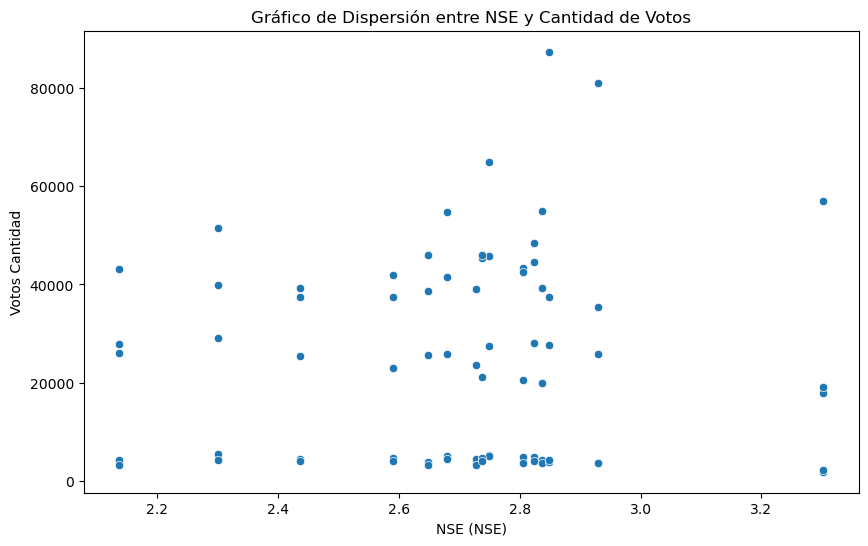

In [9]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x="NSE", y="votos_cantidad", data=df_final)
plt.title("Gráfico de Dispersión entre NSE y Cantidad de Votos")
plt.xlabel("NSE (NSE)")
plt.ylabel("Votos Cantidad")
plt.show()

Con este grafico, vemos que la mayor cantidad de votos se concentró entre 2.4 y 3 de NSE. A continuación, en el histrograma se verá con mayor claridad.

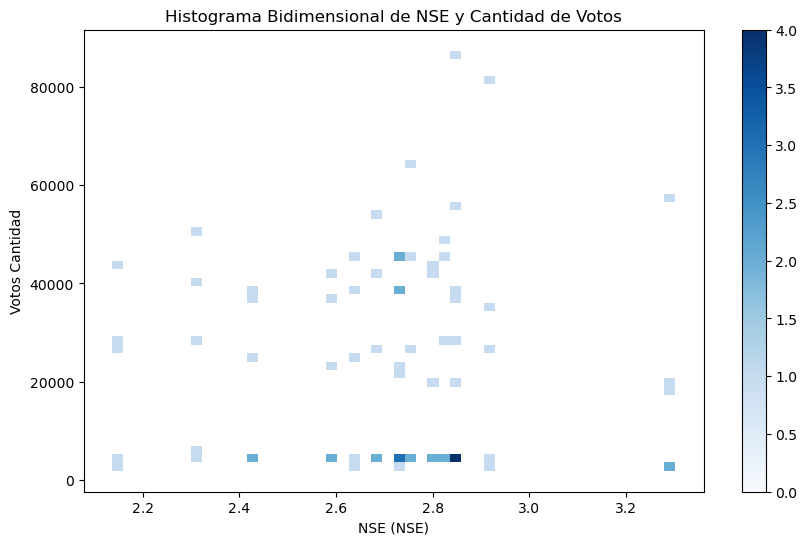

In [15]:
# Histograma bidemensional para mostar la densidad. 
plt.figure(figsize=(10, 6))
sns.histplot(x="NSE", y="votos_cantidad", data=df_final, bins=50, cmap="Blues", cbar=True)
plt.title("Histograma Bidimensional de NSE y Cantidad de Votos")
plt.xlabel("NSE (NSE)")
plt.ylabel("Votos Cantidad")
plt.show()

Ahora, para enfocarnos en el análisis de "Unión por la Patria", exploraremos la relación entre el NSE y la cantidad de votos para este partido específico.

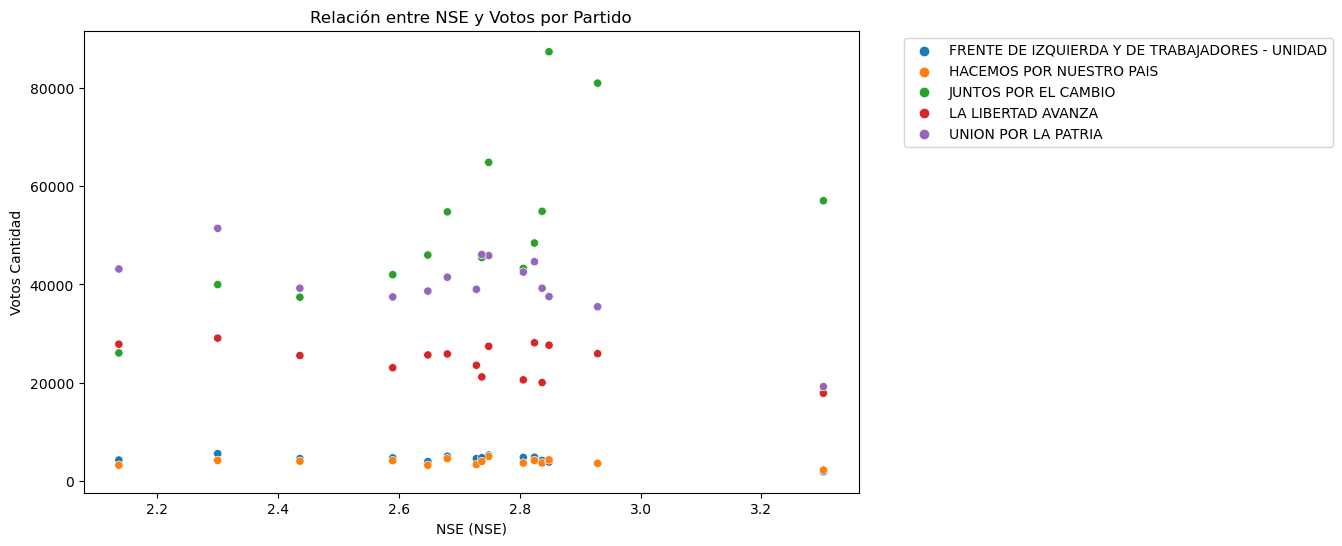

In [16]:
#distribución de votos por partido
plt.figure(figsize=(10, 6))
sns.scatterplot(x="NSE", y="votos_cantidad", hue="agrupacion_nombre", data=df_final)
plt.title("Relación entre NSE y Votos por Partido")
plt.xlabel("NSE (NSE)")
plt.ylabel("Votos Cantidad")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # para mover la leyenda fuera del gráfico
plt.show()

A partir de la observación del gráfico, se puede deducir que Juntos por el Cambio logró la mayor cantidad de votos en estratos socioeconómicos más elevados. En consecuencia, Unión por la Patria podría orientarse estratégicamente hacia la captación de votantes cuyos niveles socioeconómicos oscilen entre 2.4 y 2.8. Esta estrategía se respalda en la base de que los votos de La Libertad Avanza constituyen un núcleo duro, por lo que los esfuerzos estratégicos deberían centrarse en los votantes de Juntos por el Cambio, Hacemos por nuestro País y el FIT. 

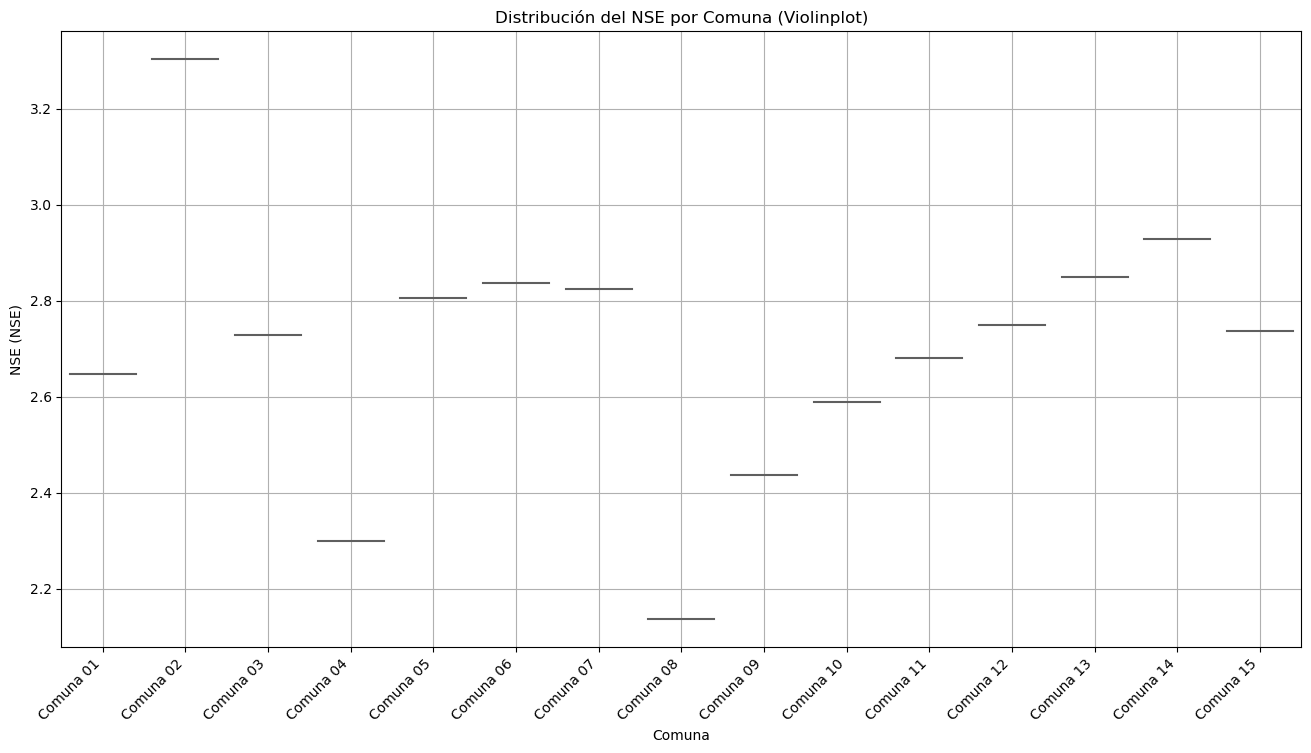

In [18]:
plt.figure(figsize=(16, 8))
sns.violinplot(x="seccion_nombre", y="NSE", data=df_final, palette="Set3")
plt.title("Distribución del NSE por Comuna (Violinplot)")
plt.xlabel("Comuna")
plt.ylabel("NSE (NSE)")
plt.xticks(rotation=45, ha="right")
plt.grid()
plt.show()

A partir de este gráfico de violin plot, diseñado para visualizar la distribución de un conjunto de datos y ofrecer información sobre su forma, podemos inferir que las comunas donde Union por la Patria podría focalizar esfuerzos para mejorar su desempeño de cara al balotaje son las comunas 1, 3, 5, 9, 10, 11, 12 y 15. Estas comunas exhiben características en su distribución que sugieren oportunidades de optimización en el respaldo electoral.

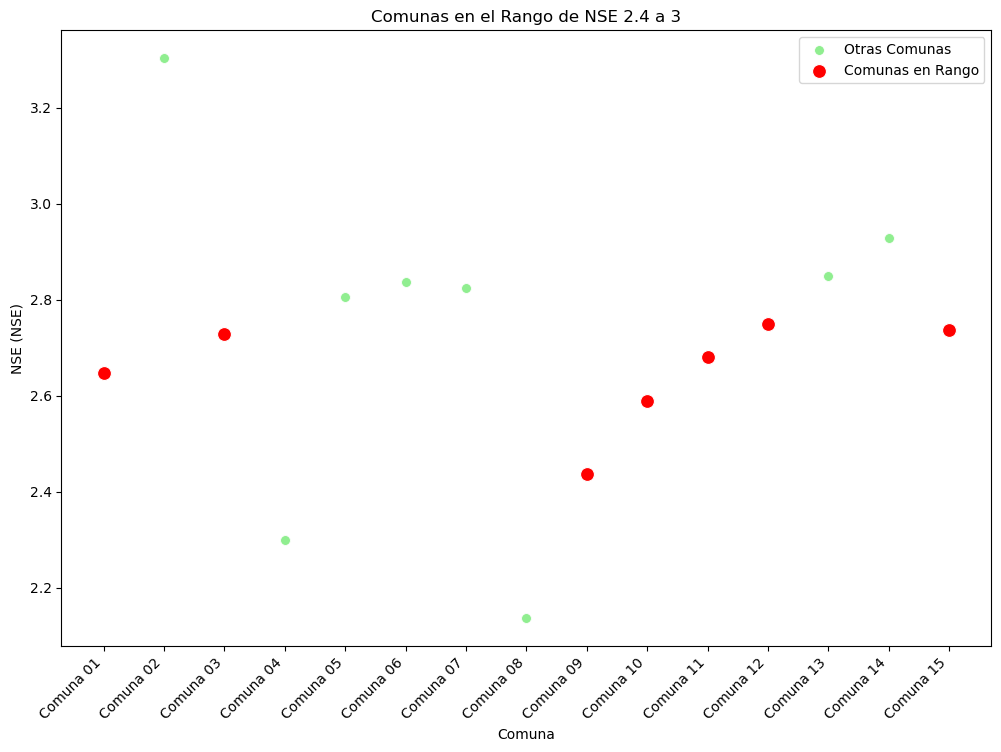

In [27]:
# Filtrar las comunas en el rango de NSE 2.4 a 2.8
comunas_rango_nse = df_final[(df_final["NSE"] >= 2.4) & (df_final["NSE"] <= 2.8)]

# Gráfico de puntos para mostrar las comunas en el rango de NSE 2.4 a 2.8
plt.figure(figsize=(12, 8))
sns.scatterplot(x="seccion_nombre", y="NSE", data=df_final, color="lightgreen", label="Otras Comunas", s=50)
sns.scatterplot(x="seccion_nombre", y="NSE", data=comunas_rango_nse, color="red", label="Comunas en Rango", s=100) #s es para el tamaño del punto
plt.title("Comunas en el Rango de NSE 2.4 a 3")
plt.xlabel("Comuna")
plt.ylabel("NSE (NSE)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

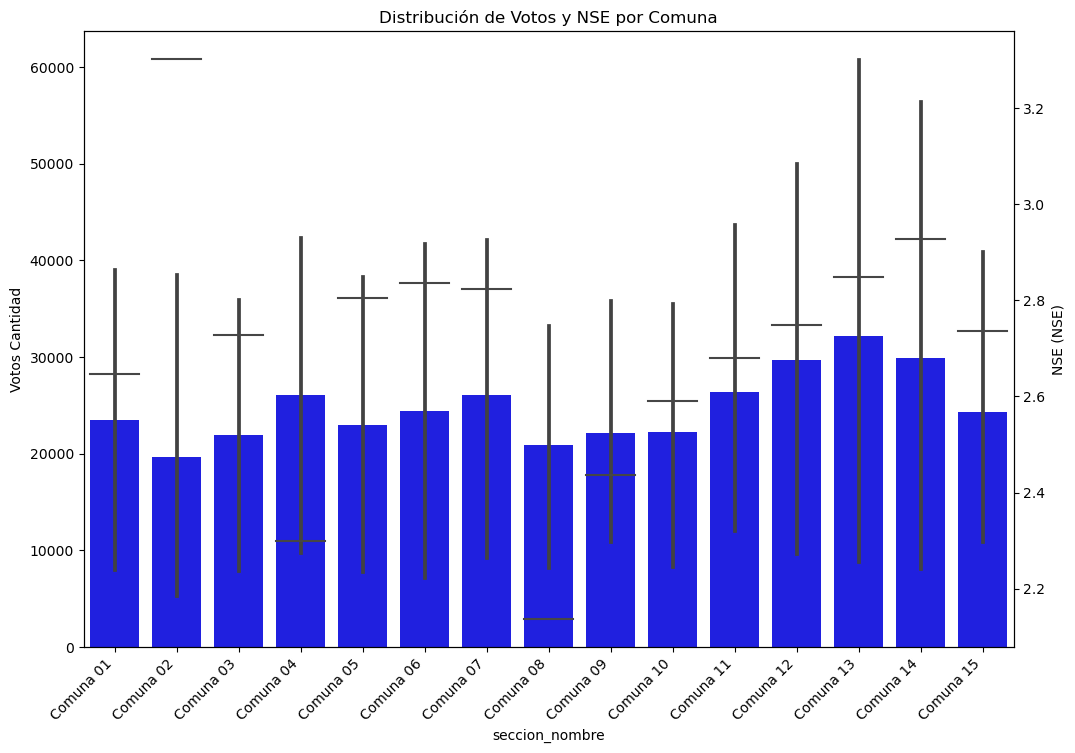

In [22]:
# Crear un gráfico combinado que reuna la distribucion de votos y NSE por comuna
plt.figure(figsize=(12, 8))
ax1 = plt.gca()  # Obtener el eje actual para votos_cantidad
ax2 = ax1.twinx()  # Crear un segundo eje y para Valor

# Graficar la distribución de votos por comuna en el primer eje y
sns.barplot(x="seccion_nombre", y="votos_cantidad", data=df_final, color='blue', ax=ax1)
ax1.set_ylabel('Votos Cantidad')

# Graficar la distribución del NSE por comuna en el segundo eje y
sns.violinplot(x="seccion_nombre", y="NSE", data=df_final, ax=ax2)
ax2.set_ylabel('NSE (NSE)')

# Rotar las etiquetas de las comunas a 45 grados para hacerlo más legible
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")

plt.title("Distribución de Votos y NSE por Comuna")
plt.xlabel("Comuna")
plt.xticks(rotation=45, ha="right")
plt.show()

Para cacterizar al votante de Unión por la patria, podemos utilizar el NSE. Para ello, el siguiente grafico mostrara cual ess la media de NSE de los votos de UNION POR LA PATRIA.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4764\4133361360.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="agrupacion_nombre", y="NSE", data=df_union_patria, ci=None, color="lightblue")


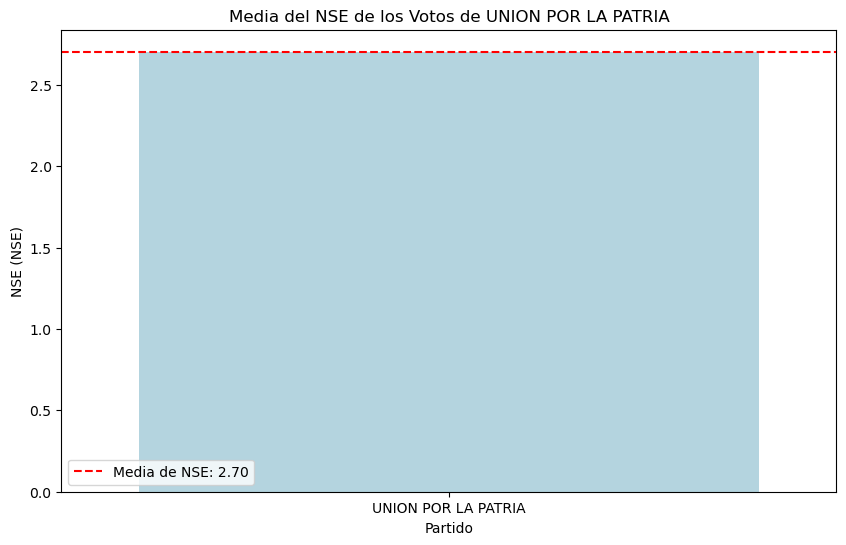

In [29]:
# Primeor filtramos datos para UNION POR LA PATRIA
df_union_patria = df_final[df_final["agrupacion_nombre"] == "UNION POR LA PATRIA"]

# Calcular la media del NSE
media_nse = df_union_patria["NSE"].mean()

# Gráfico de barra con línea de media
plt.figure(figsize=(10, 6))
sns.barplot(x="agrupacion_nombre", y="NSE", data=df_union_patria, ci=None, color="lightblue")
plt.axhline(media_nse, color="red", linestyle="--", label=f'Media de NSE: {media_nse:.2f}')
plt.title("Media del NSE de los Votos de UNION POR LA PATRIA")
plt.xlabel("Partido")
plt.ylabel("NSE (NSE)")
plt.legend()
plt.show()
